<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Logistic_Regression_for_bank_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fit Logistic Regression for bank dataset**





In [4]:
from google.colab import files
upload=files.upload()

Saving bank-full.csv to bank-full.csv


In [5]:
import pandas as pd
df=pd.read_csv("bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

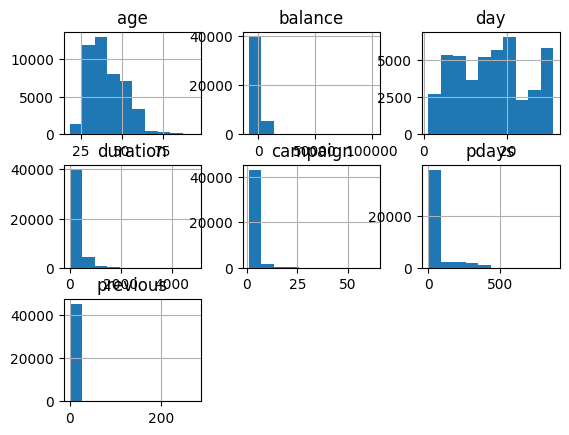

In [7]:
df.hist()

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["job"]=LE.fit_transform(df["job"])
df["marital"]=LE.fit_transform(df["marital"])
df["education"]=LE.fit_transform(df["education"])
df["default"]=LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])
df["loan"]=LE.fit_transform(df["loan"])
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])
df["y"]=LE.fit_transform(df["y"])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [11]:
len(list(df))

17

In [12]:
X=df.iloc[:,0:16]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [13]:
Y=df["y"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [15]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
Y_pred_train=LR.predict(X_train)
Y_pred_test=LR.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [18]:
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training Data:",ac1.round(3))
print("Accuracy Score Training Data:",ac2.round(3))

Accuracy Score Training Data: 0.888
Accuracy Score Training Data: 0.884


In [19]:
PS1=precision_score(Y_train,Y_pred_train)
PS2=precision_score(Y_test,Y_pred_test)
print("Precision Score Training Data:",PS1.round(3))
print("Precision Score Training Data:",PS2.round(3))

Precision Score Training Data: 0.555
Precision Score Training Data: 0.542


In [20]:
RS1=recall_score(Y_train,Y_pred_train)
RS2=recall_score(Y_test,Y_pred_test)
print("Recall Score Training Data:",RS1.round(3))
print("Recall Score Training Data:",RS2.round(3))

Recall Score Training Data: 0.175
Recall Score Training Data: 0.181


In [21]:
f1=f1_score(Y_train,Y_pred_train)
f2=f1_score(Y_test,Y_pred_test)
print("Recall Score Training Data:",f1.round(3))
print("Recall Score Training Data:",f2.round(3))

Recall Score Training Data: 0.266
Recall Score Training Data: 0.272


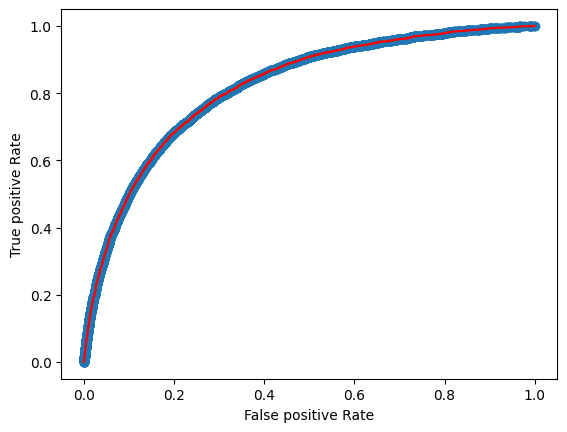

 who age  subscribed a term deposit under curve score: 0.818


In [22]:
LR.predict(X)
Y_probabilties =LR.predict_proba(X)[:,1]

from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,NA = roc_curve(Y,Y_probabilties)

import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

print(" who age  subscribed a term deposit under curve score:", roc_auc_score(Y,Y_probabilties).round(3))



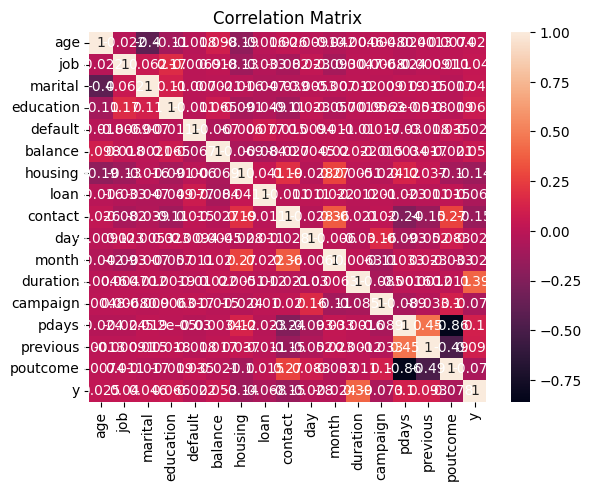

In [30]:
#Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [32]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Perform grid search on the dataset
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.97


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': randint(2, 11)
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform randomized search on the dataset
random_search.fit(X, y)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))


Best Parameters:  {'max_depth': 100, 'min_samples_split': 9, 'n_estimators': 70}
Best Accuracy: 0.97


In [38]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['petal_width'])

fig.update_layout(
    title='Interactive Scatter Plot Example',
    xaxis_title='Sepal Width',
    yaxis_title='Sepal Length'
)
fig.show()
